# Topology Draw


In [1]:
import scenario_build as sb
import numpy as np
import EdgeSimPy.edge_sim_py as espy
import matplotlib.pyplot as plt
import networkx as nx

x_size = 10
y_size = x_size
grid = sb.create_grid(x_size, y_size)
sb.create_base_stations(grid)
topology = sb.create_topology()
sb.create_cloud_servers(topology, grid)
print()

ImportError: cannot import name 'EdgeServer' from partially initialized module 'EdgeSimPy.edge_sim_py.components' (most likely due to a circular import) (/Users/paulo/Developer/python/espy-user-mobility/EdgeSimPy/edge_sim_py/components/__init__.py)

In [2]:
spectral_pos = nx.spectral_layout(topology, weight="delay")

In [3]:
kamada_pos = nx.kamada_kawai_layout(topology, pos=spectral_pos)

/Users/paulo/Developer/python/espy-user-mobility/.venv/lib/python3.11/site-packages/networkx/drawing/layout.py:745: RuntimeWarning: divide by zero encountered in divide
  direction = np.einsum("ijk,ij->ijk", delta, 1 / (nodesep + np.eye(nNodes) * 1e-3))


In [8]:
# pos_dict = {"kamada-kawai_init_spectral": kamada_pos, "spectral": spectral_pos, "spring_init_spectral": spring_pos}
pos_dict = {"kamada": kamada_pos, "spectral": spectral_pos}
# pos_dict = {"spectral": spectral_pos}

Creating kamada plot
Creating spectral plot


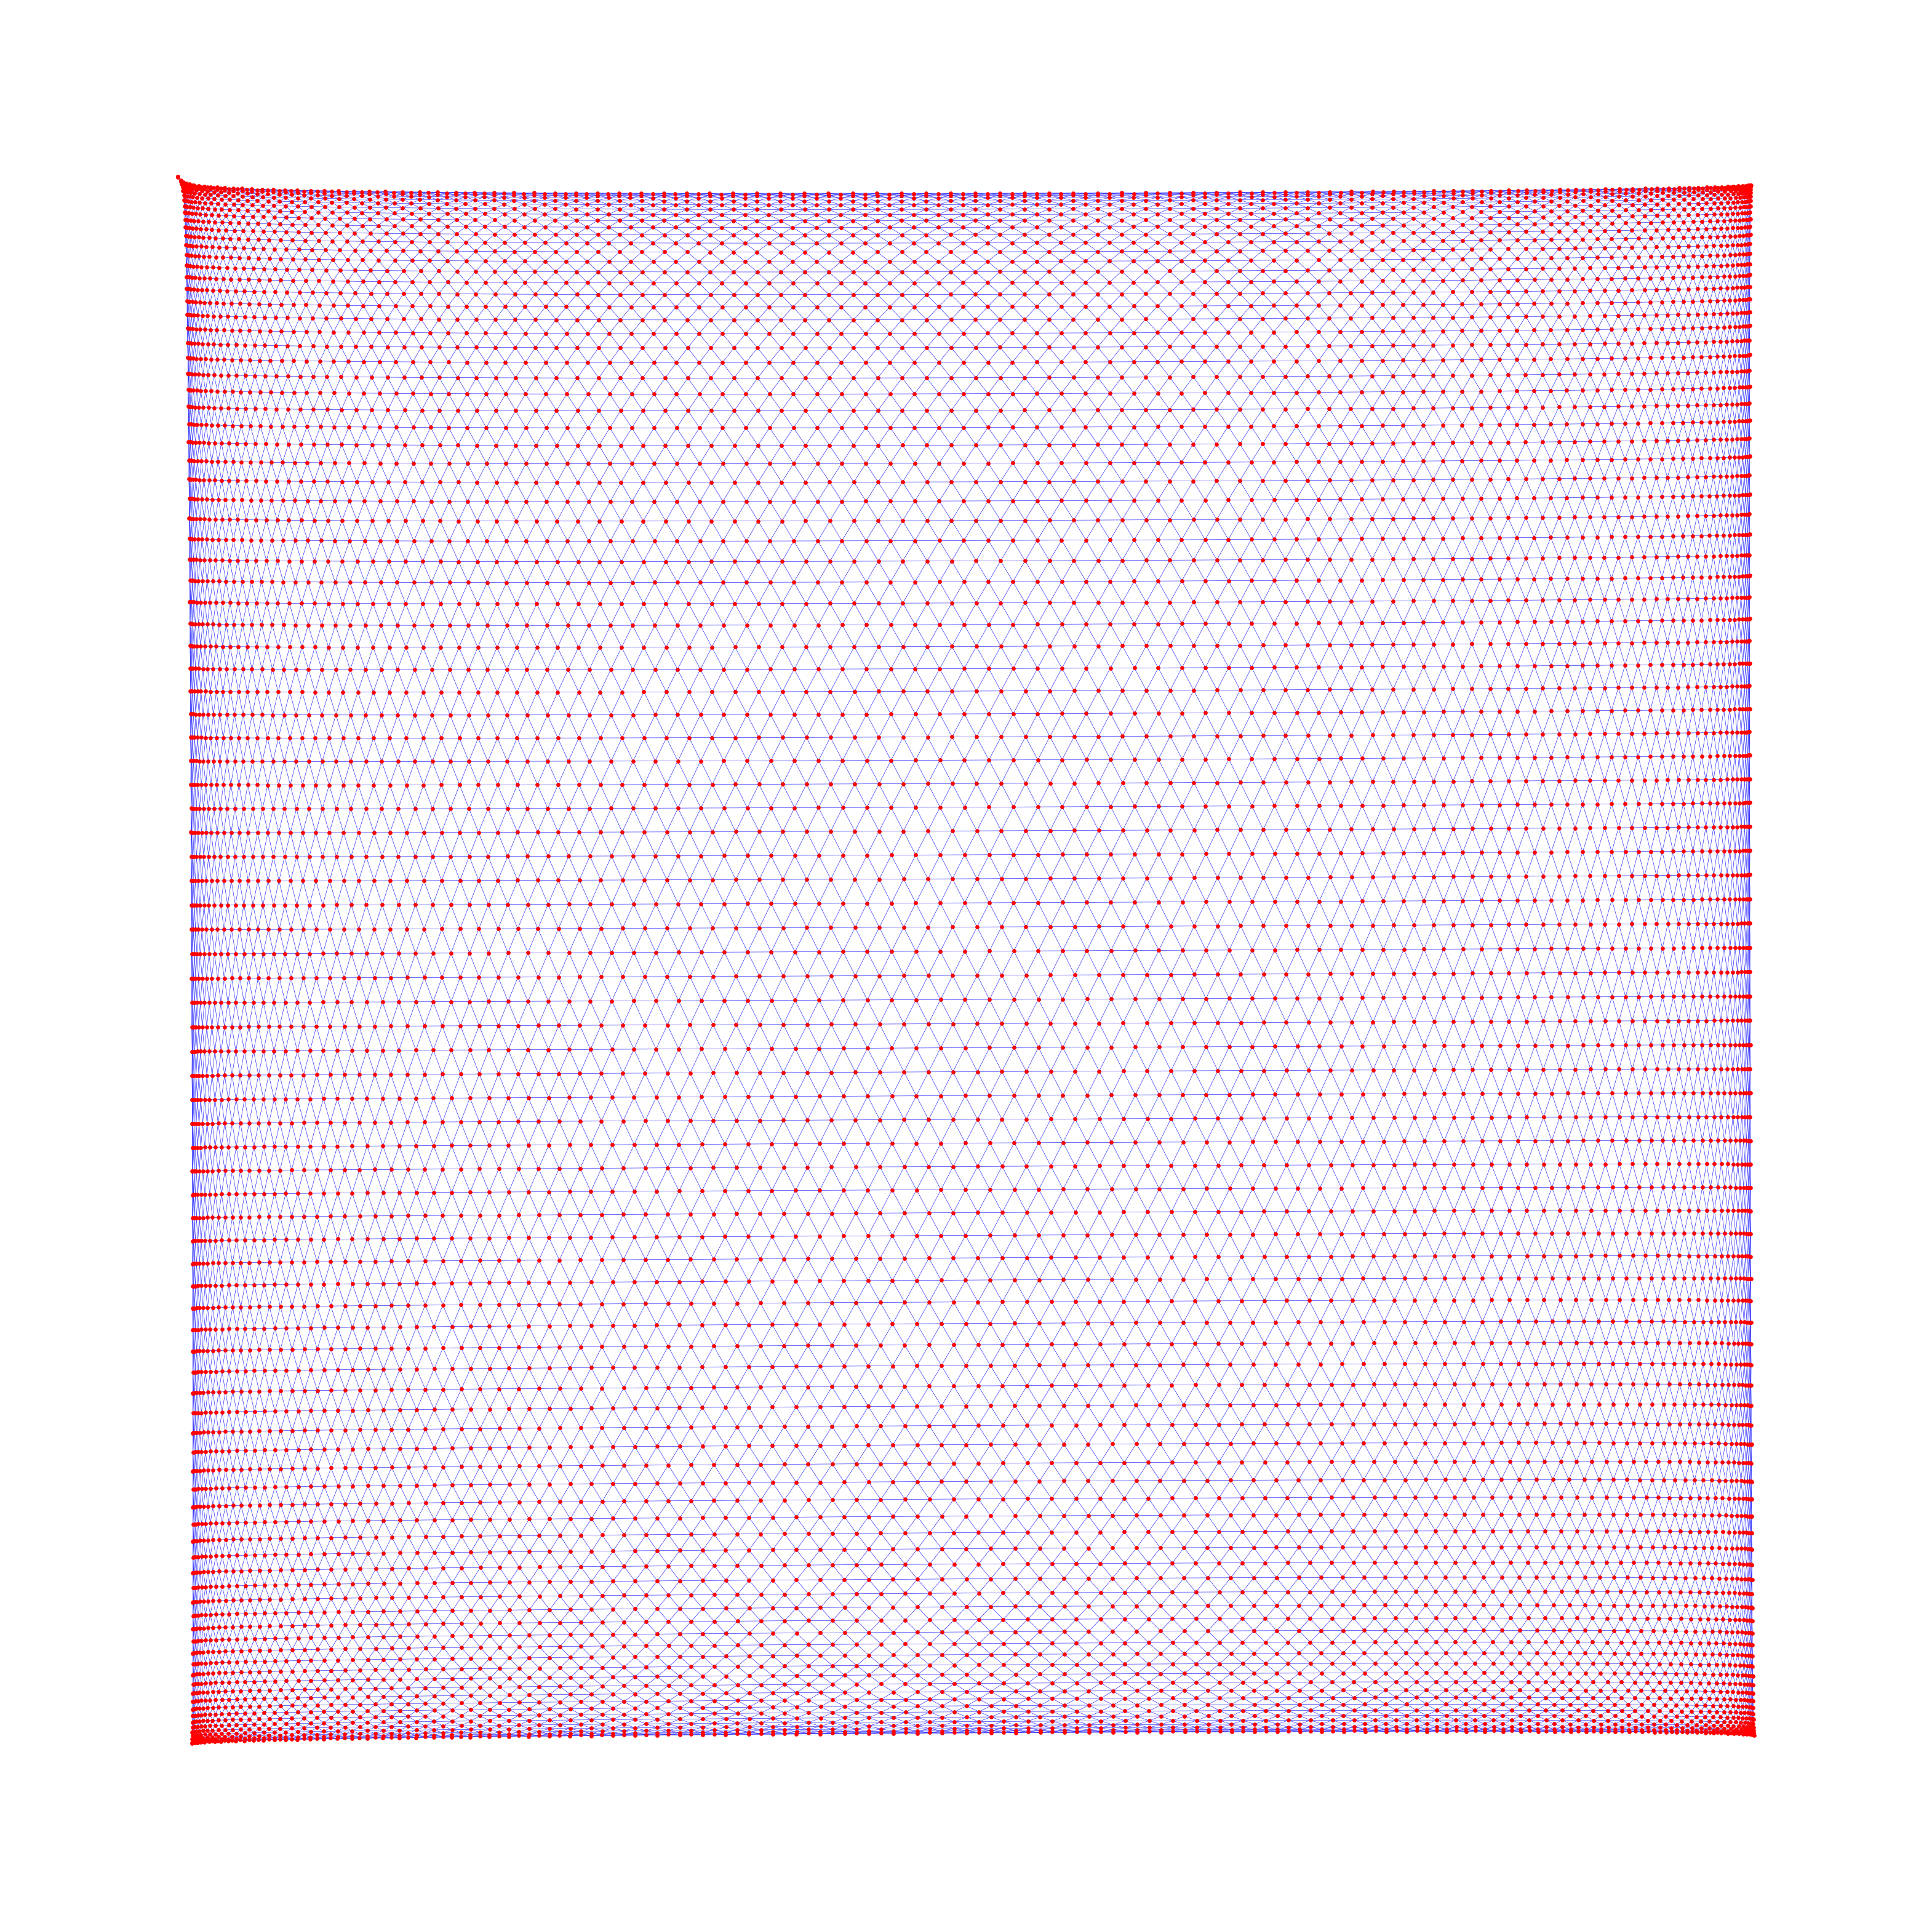

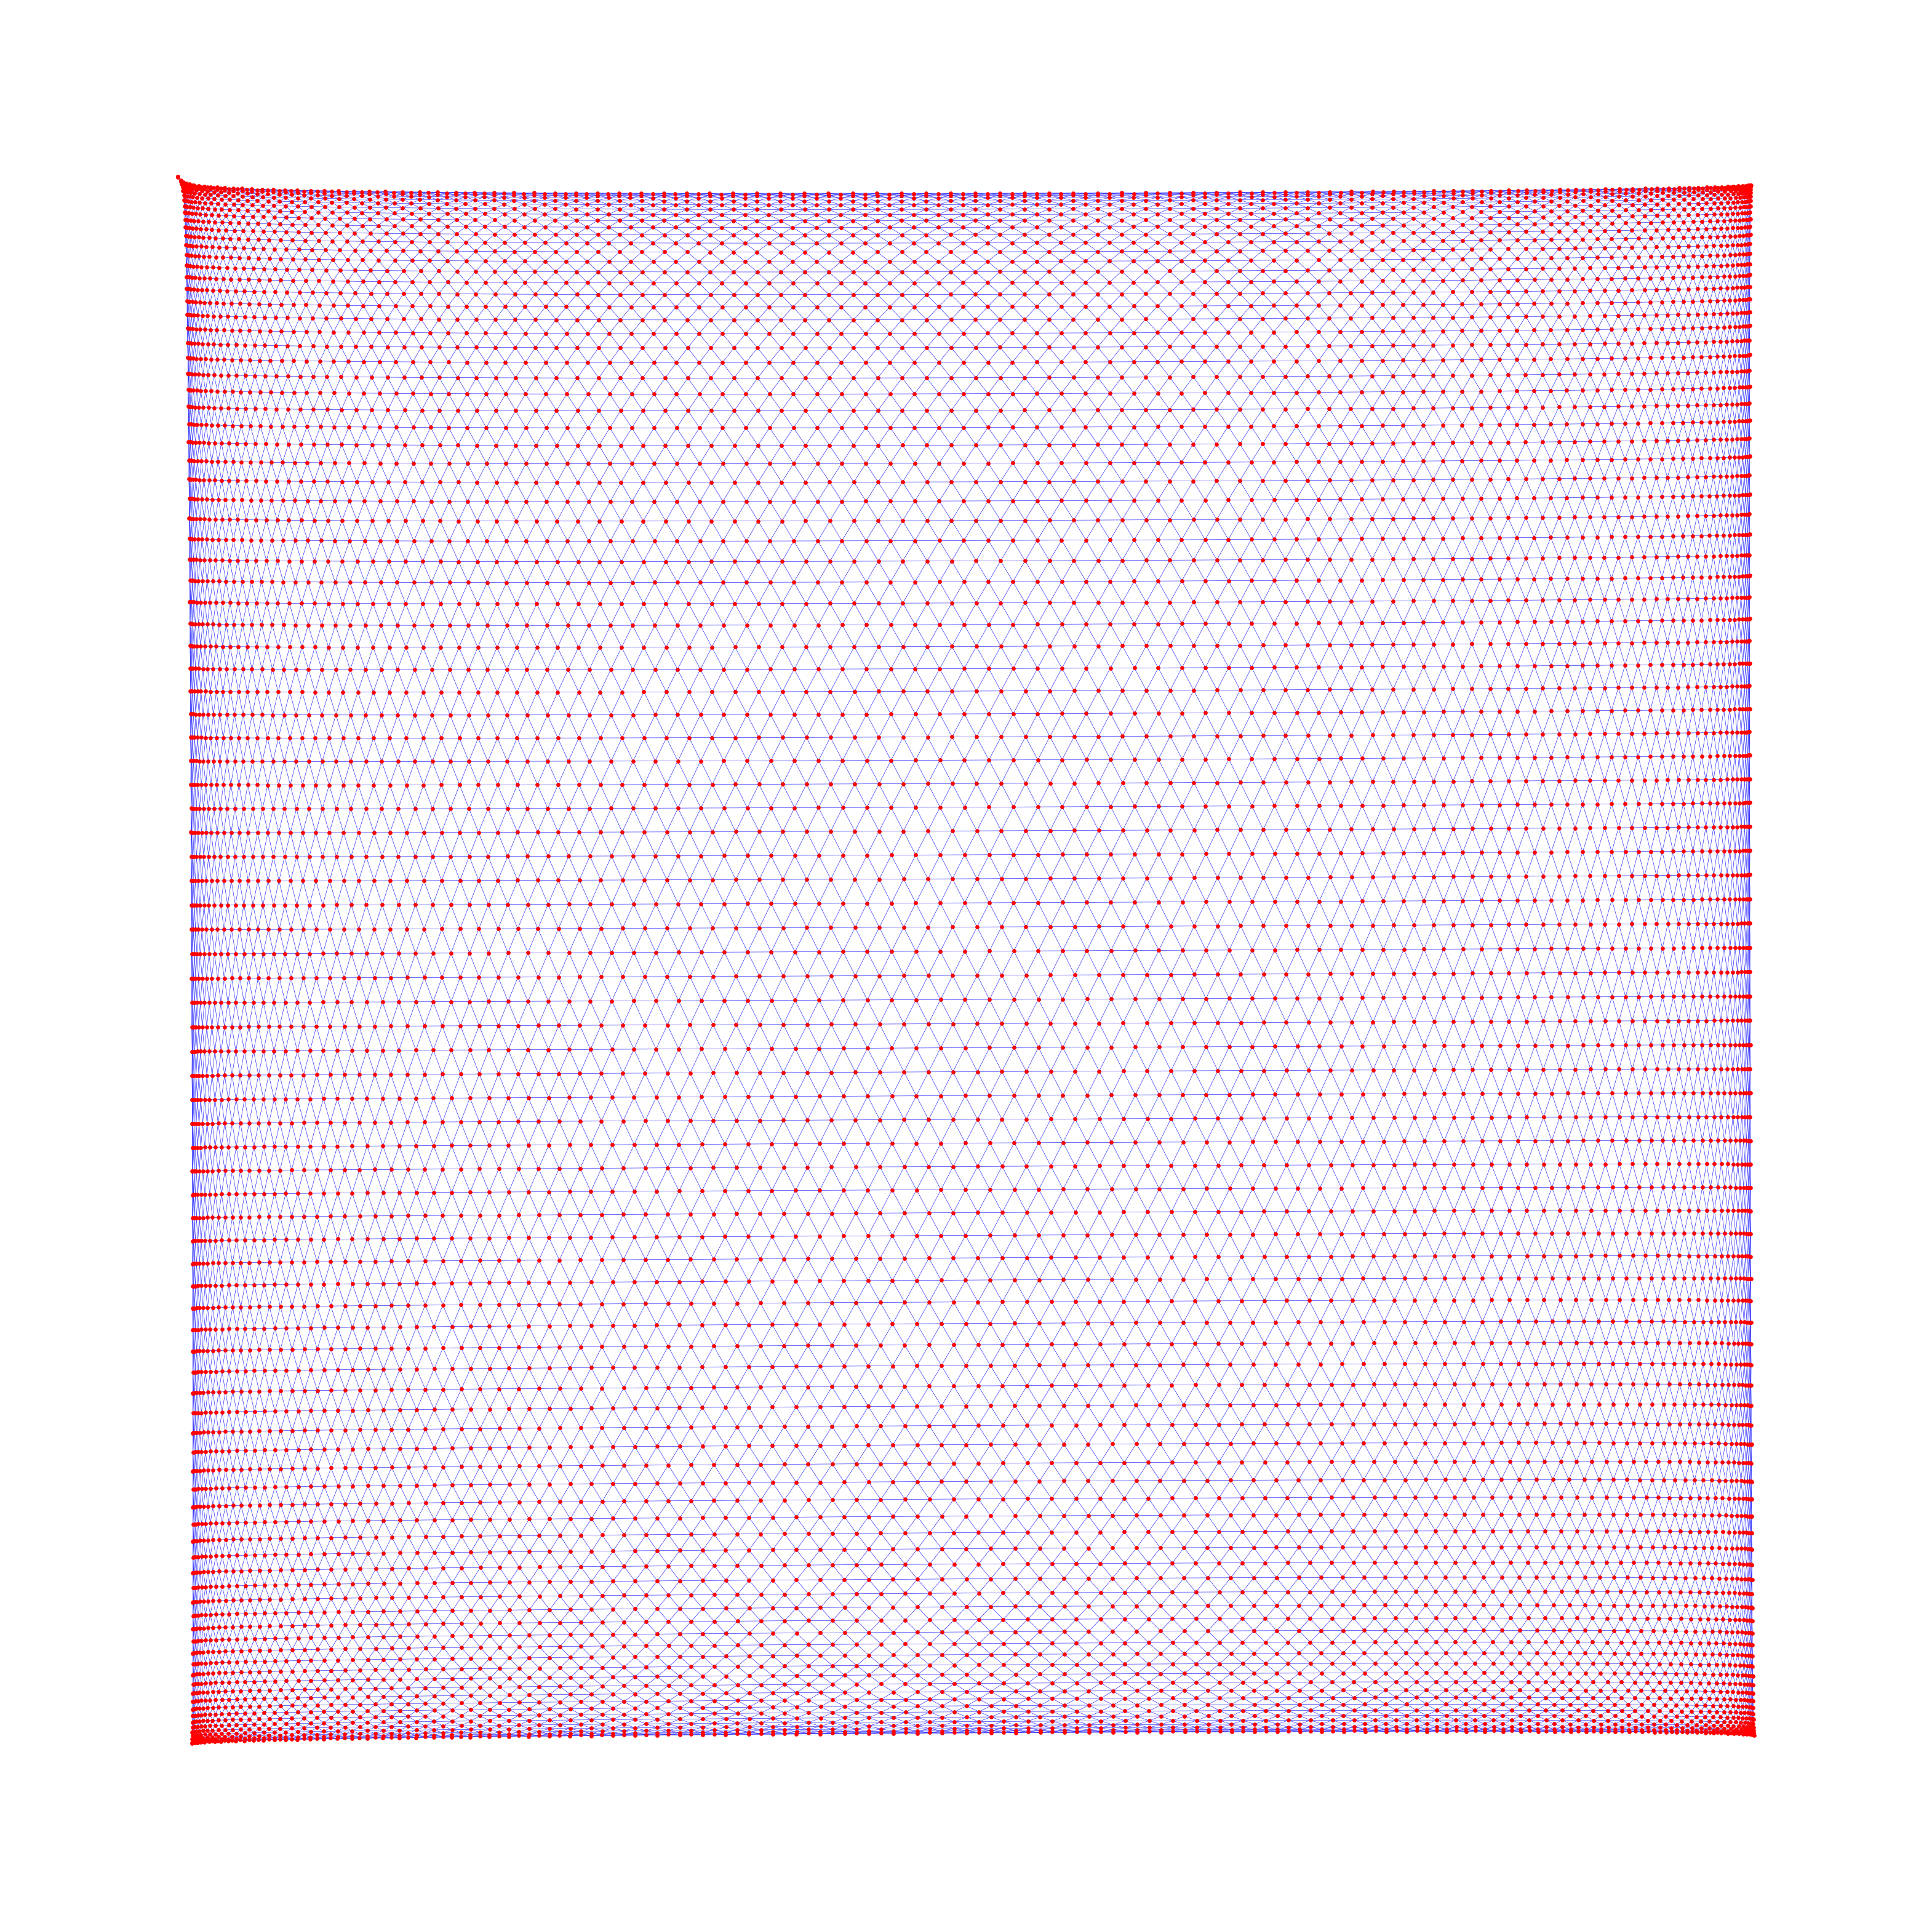

In [9]:
for name, pos in pos_dict.items():
    print(f"Creating {name} plot")
    plt.figure(figsize=(20, 20), dpi=200)
    plt.axis("off")
    nx.draw(
        topology,
        with_labels=False,
        font_size=2,
        font_color=(0, 0, 0, 0.5),
        node_size=2,
        node_color="red",
        edge_color="blue",
        width=0.2,
        pos=pos,
    )
    plt.savefig(f"topology_images/{x_size}x{y_size}_{name}.svg")
    plt.savefig(f"topology_images/{x_size}x{y_size}_{name}.png")